# Chapter 3: Image Convolution

Convolution is an important operation in signal and image processing. Convolution operates on two signals (in 1D) or two images (in 2D): you can think of one as the "input" as image, and the other (called the kernel) as a "filter" on the input image, producing an output image.

An example of convolution with box filter is given below (source: https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html):

<img src="Images/moving average.gif" alt="Convolution 2D">



In [1]:
import cv2
import os
import sys
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def myConvolve2d(image, kernel):
    """
    In this function convolution operation is implemented from scratch
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    """
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    
    # Loop over every pixel of the image and implement convolution operation (element wise multiplication and summation). 
    # You can use two loops. The result is stored in the variable output.
    
    for x in range(image.shape[0]):     # Loop over every pixel of the image
        for y in range(image.shape[1]):
            # element-wise multiplication and summation 
            output[x,y]=(kernel*image_padded[x:x+3,y:y+3]).sum()
        
    
    return output

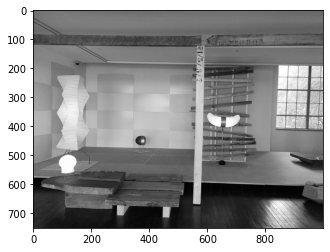

In [3]:
img = io.imread("./Images/image1.jpg",1)
plt.imshow(img,cmap=plt.cm.gray)

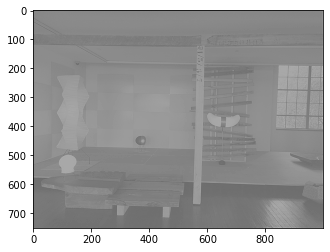

In [4]:
# Convolve the sharpen kernel (laplacian) and the image
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
#Call the function my_convolve2d from the file imageOperations.py, which you have to implement.
image_sharpen = myConvolve2d(img,kernel)
plt.imshow(image_sharpen,cmap=plt.cm.gray)

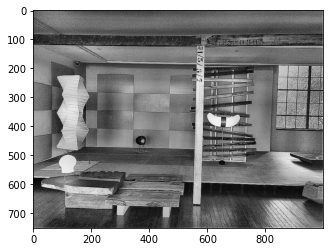

In [5]:
from skimage import exposure
# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized,cmap=plt.cm.gray)

Using built-in function from Scipy image processing library

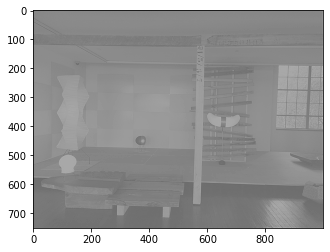

In [6]:
from scipy import signal
f = signal.convolve2d(img,kernel, 'same')
plt.imshow(f,cmap=plt.cm.gray)

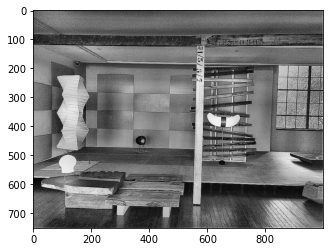

In [7]:
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(f)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized,cmap=plt.cm.gray)